In [5]:
%pylab inline
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


Mean
0.02238621
percent s < 10^-4
52.559999999999995
percent 10^-4 <= s < 10^-3
11.86
percent 10^-3 <= s < 10^-2
14.46
percent s >= 0.01
21.12
Median
5.5465277104490204e-05


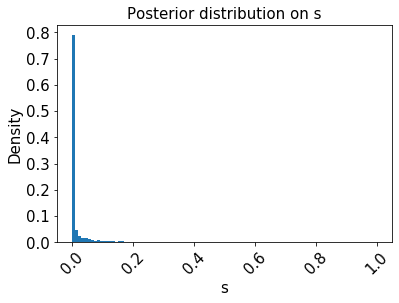

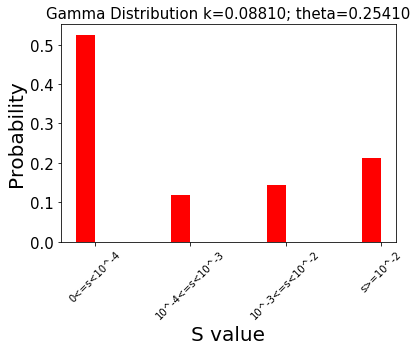

In [8]:
# Plot gamma distribution

shape, scale = 0.0881, 0.2541

print('Mean')
print(shape*scale)

beta = 1/scale
num_sims = 10000
s = []
for i in range(0, num_sims):
    s_val = np.random.gamma(shape, scale)
    if s_val > 1:
        s_val = 1
    
    s.append(s_val)

svals = [0, 0, 0, 0]
for elem in s:
    
    if elem < 10**-4:
        svals[0] += 1
    elif elem < 10**-3:
        svals[1] += 1
    elif elem < 10**-2:
        svals[2] += 1
    elif elem >= 10**-2:
        svals[3] += 1

print("percent s < 10^-4")
print(svals[0]/num_sims*100)
print("percent 10^-4 <= s < 10^-3")
print(svals[1]/num_sims*100)
print("percent 10^-3 <= s < 10^-2")
print(svals[2]/num_sims*100)
print("percent s >= 0.01")
print(svals[3]/num_sims*100)

print('Median')
print(np.median(s))

# Plot pdf of gamma distribution
plt.figure(1)
plt.hist(s, bins = 100, weights=np.ones(len(s)) / len(s)) 
plt.xlabel("s", size = 15)
plt.ylabel("Density", size = 15)
plt.title("Posterior distribution on s", size=15)
plt.savefig("/storage/BonnieH/selection_project/figures/figures/gamma_distribution/gamma_distribution_pdf_k_%.4f_theta_%.4f.pdf"%(shape,scale),bbox_inches='tight')
plt.xticks(fontsize=15, rotation=45) 
plt.yticks(fontsize=15)
plt.show()

# Plot discrete pdf of gamma distribution
plt.figure(2)
x = ['0<=s<10^-4', '10^-4<=s<10^-3', '10^-3<=s<10^-2', 's>=10^-2']
y_pos = np.arange(len(x))
barWidth = 0.2
r1 = np.arange(len(x))
total = sum(svals)
for i in range(0, len(svals)):
    svals[i] = svals[i]/total
plt.bar(r1, svals, color='red', width=barWidth) 
plt.xticks([r + barWidth/2 for r in range(len(x))], x)
plt.xticks(fontsize=10, rotation=45) 
plt.yticks(fontsize=15)
plt.xlabel("S value", size=20)
plt.ylabel("Probability", size=20)
plt.title("Gamma Distribution k=%.5f; theta=%.5f"%(shape, scale), size=15) 
plt.savefig("/storage/BonnieH/selection_project/figures/figures/gamma_distribution/gamma_distribution_pdf_discrete_k_%.4f_theta_%.4f.pdf"%(shape,scale),bbox_inches='tight')